In [1]:


import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):   
    with open(filename) as training_file:
        csv_read= csv.reader(training_file)
        line_first = True
        images_lst = []
        labels_lst = []
        for row in csv_read:
            if line_first:
                line_first = False
            else:
                labels_lst.append(row[0])
                image_arr = row[1:785]
                image_array = np.array_split(image_arr,28)
                images_lst.append(image_array)
      # Your code starts here
      # Your code ends here
        images = np.array(images_lst).astype('float')
        labels = np.array(labels_lst).astype('float')
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis = 3)
testing_images = np.expand_dims(testing_images,axis = 3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   zoom_range=0.20,
                                   fill_mode = 'nearest'                                  
     )

validation_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   zoom_range=0.20,
                                   fill_mode = 'nearest'   )   
    # Your Code Here)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(25,activation='softmax')
    
])

# Compile Model. 
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images,training_labels,batch_size=32),
                             steps_per_epoch = len(training_images)/32,
                             epochs = 15,
                             validation_data = validation_datagen.flow(testing_images,testing_labels,batch_size=32),
                             validation_steps=len(testing_images)/32)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/15
858/857 [==============================] - 95s 110ms/step - loss: 1.8405 - acc: 0.4375 - val_loss: 1.2344 - val_acc: 0.5866
Epoch 2/15
858/857 [==============================] - 92s 108ms/step - loss: 0.7987 - acc: 0.7423 - val_loss: 0.7589 - val_acc: 0.7454
Epoch 3/15
858/857 [==============================] - 88s 103ms/step - loss: 0.5185 - acc: 0.8314 - val_loss: 0.5825 - val_acc: 0.8002
Epoch 4/15
858/857 [==============================] - 91s 106ms/step - loss: 0.3750 - acc: 0.8726 - val_loss: 0.4516 - val_acc: 0.8483
Epoch 5/15
858/857 [==============================] - 90s 105ms/step - loss: 0.2797 - acc: 0.9085 - val_loss: 0.3708 - val_acc: 0.8780
Epoch 6/15
858/857 [==============================] - 89s 104ms/step - loss: 0.2322 - acc: 0.9253 - val_loss: 0.3410 - val_acc: 0.8911
Epoch 7/15
858/857 [==============================] - 90s 105ms/step - loss: 0.1915 - acc: 0.9355 - val_loss: 0.2618 - val_acc: 0.9180
Epoch 8/15
858/857 [==============================] - 8

[38.51995945127127, 0.9418572]

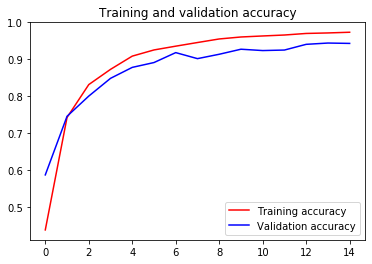

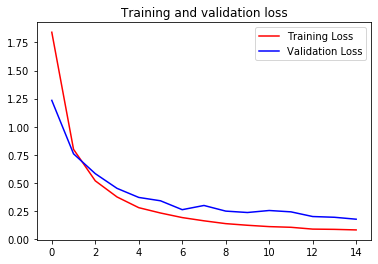

In [5]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()